In [ ]:
# Uninstall TensorFlow if already installed
!pip uninstall -y tensorflow

# Install TensorFlow again
!pip install tensorflow


Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 31.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2

In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 101.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 41.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    

In [ ]:
!pip install scikeras[tensorflow]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 66.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import tensorflow as tf

# Verify TensorFlow version
print("TensorFlow version:", tf.__version__)

# Import Keras submodules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Print success message if imports work
print("Keras imports successful!")


TensorFlow version: 2.17.0
Keras imports successful!


Data Cleaning

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import random

In [ ]:
# Define the needed columns and new column names
desired_columns = ["timestamp", "avg cpu"]
new_column_names = {"timestamp": "time", "avg cpu": "avg_cpu"}

# Read the CSV file, specify the desired columns, and parse the timestamp column
df = pd.read_csv("cpu_util.csv", usecols=desired_columns, parse_dates=["timestamp"])

# Rename columns to new names
df = df.rename(columns=new_column_names)

# Set the time column as the index and ensure it's in the correct datetime format
df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True)
df = df.set_index("time")

# Ensure the DataFrame is in 5-minute intervals
df = df.asfreq('5T')

<ipython-input-2-c7d8a3b5726f>:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True)


In [ ]:
# Check for the number of null values
null_counts = df.isnull().sum()

# Output the result
print(null_counts)

avg_cpu    0
dtype: int64


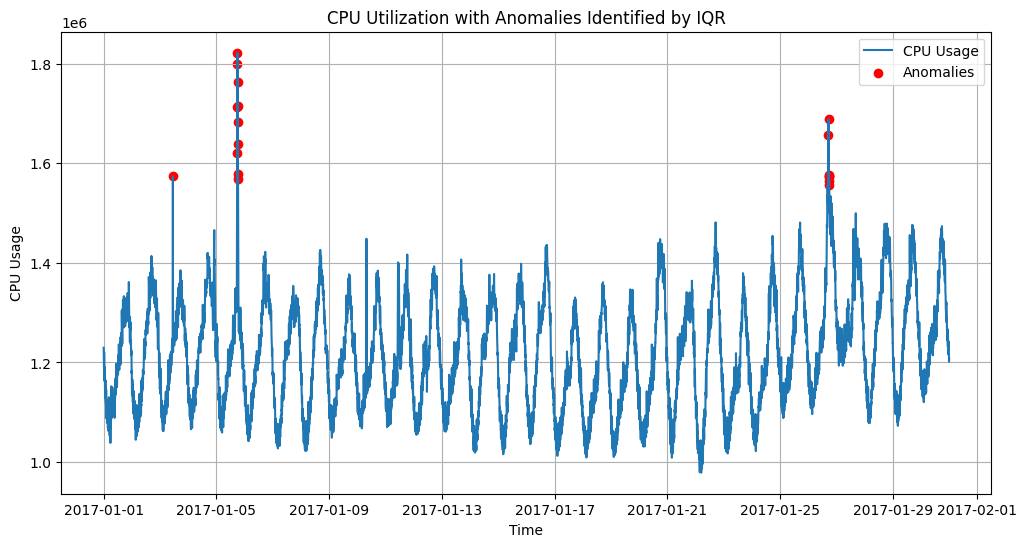

In [ ]:
# Calculate IQR
Q1 = df['avg_cpu'].quantile(0.25)
Q3 = df['avg_cpu'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify anomalies (e.g., 1.5 * IQR)
iqr_threshold = 1.5
lower_bound = Q1 - iqr_threshold * IQR
upper_bound = Q3 + iqr_threshold * IQR
anomalies_iqr = df[(df['avg_cpu'] < lower_bound) | (df['avg_cpu'] > upper_bound)]

# Mark anomalies
df['anomaly'] = (df['avg_cpu'] < lower_bound) | (df['avg_cpu'] > upper_bound)

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['avg_cpu'], label='CPU Usage')
plt.scatter(anomalies_iqr.index, anomalies_iqr['avg_cpu'], color='red', label='Anomalies')
plt.title('CPU Utilization with Anomalies Identified by IQR')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.grid(True)
plt.show()

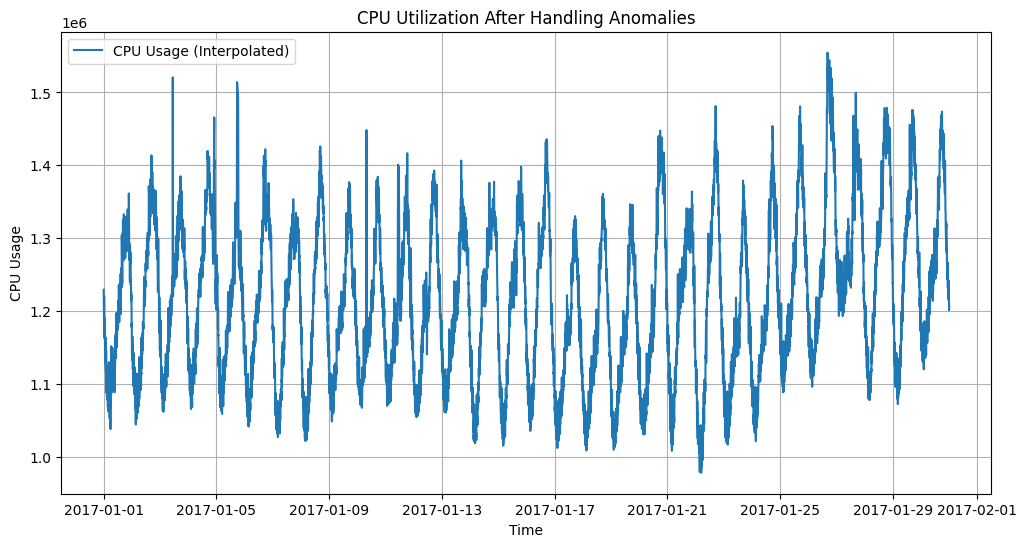

In [ ]:
# Interpolating anomalies
df['avg_cpu'] = np.where(df['anomaly'] == True, np.nan, df['avg_cpu'])
df['avg_cpu'] = df['avg_cpu'].interpolate(method='time')

# Drop the anomaly column as it's no longer needed
df = df.drop(columns=['anomaly'])

# Plot the data after interpolation
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['avg_cpu'], label='CPU Usage (Interpolated)')
plt.title('CPU Utilization After Handling Anomalies')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.grid(True)
plt.show()

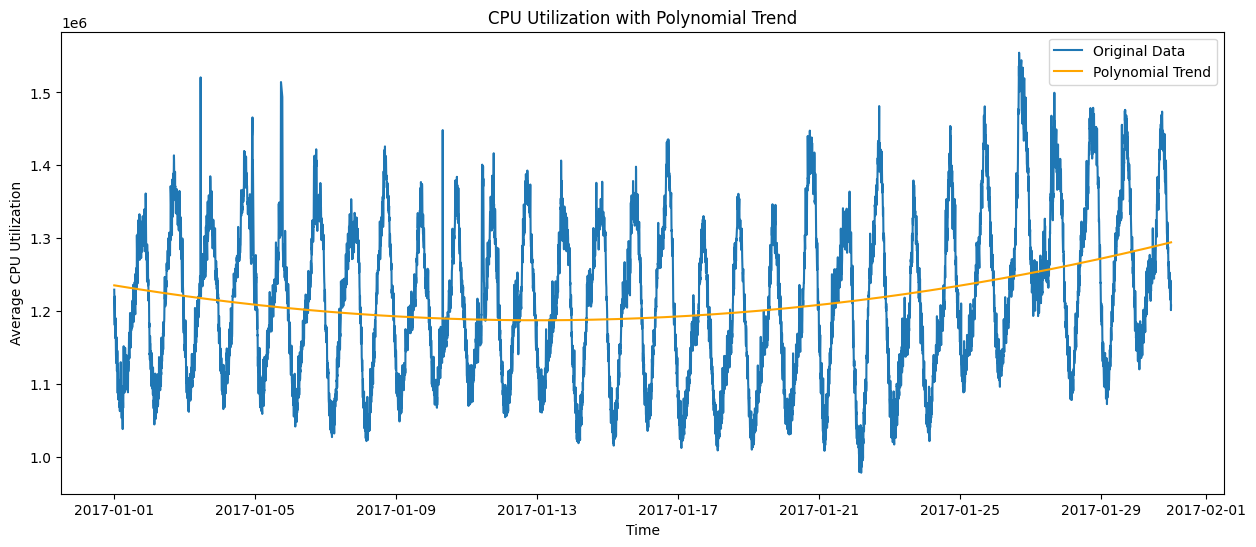

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Convert the time index to numerical values (e.g., the number of minutes since the start)
time_numeric = np.arange(len(df)).reshape(-1, 1)

# Define the degree of the polynomial
degree = 2  # You can experiment with different degrees

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
time_poly = poly.fit_transform(time_numeric)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(time_poly, df['avg_cpu'])

# Predict the trend
trend = model.predict(time_poly)
df['trend'] = trend

# Plot the original data and the polynomial trend
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['avg_cpu'], label='Original Data')
plt.plot(df.index, df['trend'], label='Polynomial Trend', color='orange')
plt.title('CPU Utilization with Polynomial Trend')
plt.xlabel('Time')
plt.ylabel('Average CPU Utilization')
plt.legend()
plt.show()


Dense (1) base training, validation, and testing

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import random

# Set seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Function to create Fourier series
def create_fourier_series(df, period, order):
    t = np.arange(len(df))
    for k in range(1, order + 1):
        df[f'sin_{period}_{k}'] = np.sin(2 * np.pi * k * t / period)
        df[f'cos_{period}_{k}'] = np.cos(2 * np.pi * k * t / period)
    return df

df = create_fourier_series(df, period=24, order=3)
df = create_fourier_series(df, period=24 * 7, order=3)

# Add more lag features
max_lag = 36
for lag in range(1, max_lag + 1):
    df[f'avg_cpu_lag_{lag}'] = df['avg_cpu'].shift(lag)
df.dropna(inplace=True)

# Normalize the features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

features = feature_scaler.fit_transform(df.drop(columns=['avg_cpu']))
target = target_scaler.fit_transform(df['avg_cpu'].values.reshape(-1, 1)).reshape(-1)

# Function to create sliding windows with features
def create_sliding_windows_with_features(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 50
X, y = create_sliding_windows_with_features(features, target, window_size)

# Split the data into training, validation, and testing sets
total_samples = len(X)
train_size = int(total_samples * 0.7)
val_size = int(total_samples * 0.2)
test_size = total_samples - train_size - val_size

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

In [ ]:
# Define the GRU model
model_final = Sequential([
    GRU(64, input_shape=(window_size, X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    GRU(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model_final.compile(optimizer='adam', loss='mse')
history = model_final.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
188/188 [==============================] - 9s 34ms/step - loss: 0.0209 - val_loss: 0.0027
Epoch 2/50
188/188 [==============================] - 6s 31ms/step - loss: 0.0073 - val_loss: 0.0023
Epoch 3/50
188/188 [==============================] - 6s 31ms/step - loss: 0.0059 - val_loss: 0.0037
Epoch 4/50
188/188 [==============================] - 6s 31ms/step - loss: 0.0049 - val_loss: 0.0028
Epoch 5/50
188/188 [==============================] - 6s 31ms/step - loss: 0.0043 - val_loss: 0.0020
Epoch 6/50
188/188 [==============================] - 6s 31ms/step - loss: 0.0041 - val_loss: 0.0058
Epoch 7/50
188/188 [==============================] - 6s 31ms/step - loss: 0.0042 - val_loss: 0.0020
Epoch 8/50
188/188 [==============================] - 6s 31ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 9/50
188/188 [==============================] - 6s 31ms/step - loss: 0.0034 - val_loss: 0.0018
Epoch 10/50
188/188 [==============================] - 6s 31ms/step - loss: 0.0031 - val_lo

27/27 [==============================] - 0s 9ms/step
Train MAE: 12907.837182669304, Train MAPE: 0.010656278009128339, Train Accuracy: 0.9893437219908716
Validation MAE: 15074.347152162038, Validation MAPE: 0.012071681436334893, Validation Accuracy: 0.9879283185636651
Test MAE: 12652.64375710138, Test MAPE: 0.009869575650662944, Test Accuracy: 0.9901304243493371


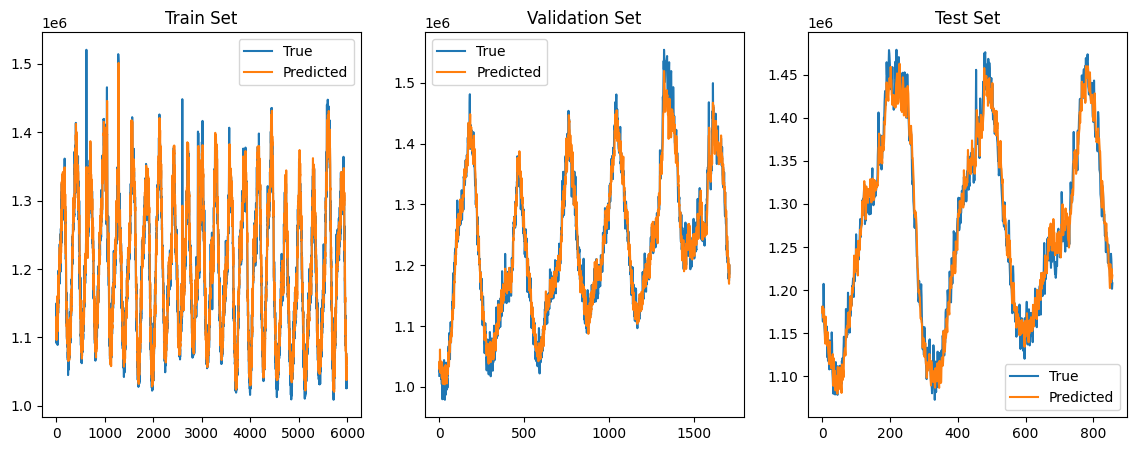

In [ ]:
# Predict and inverse transform the predictions
y_train_pred = model_final.predict(X_train)
y_val_pred = model_final.predict(X_val)
y_test_pred = model_final.predict(X_test)

y_train_true = target_scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_true = target_scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_true = target_scaler.inverse_transform(y_test.reshape(-1, 1))

y_train_pred = target_scaler.inverse_transform(y_train_pred)
y_val_pred = target_scaler.inverse_transform(y_val_pred)
y_test_pred = target_scaler.inverse_transform(y_test_pred)

# Calculate MAE, MAPE, and accuracy
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    accuracy = 1 - mape
    return mae, mape, accuracy

train_mae, train_mape, train_accuracy = calculate_metrics(y_train_true, y_train_pred)
val_mae, val_mape, val_accuracy = calculate_metrics(y_val_true, y_val_pred)
test_mae, test_mape, test_accuracy = calculate_metrics(y_test_true, y_test_pred)

# Print the metrics
print(f'Train MAE: {train_mae}, Train MAPE: {train_mape}, Train Accuracy: {train_accuracy}')
print(f'Validation MAE: {val_mae}, Validation MAPE: {val_mape}, Validation Accuracy: {val_accuracy}')
print(f'Test MAE: {test_mae}, Test MAPE: {test_mape}, Test Accuracy: {test_accuracy}')

# Plot the results
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.plot(y_train_true, label='True')
plt.plot(y_train_pred, label='Predicted')
plt.title('Train Set')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_val_true, label='True')
plt.plot(y_val_pred, label='Predicted')
plt.title('Validation Set')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test_true, label='True')
plt.plot(y_test_pred, label='Predicted')
plt.title('Test Set')
plt.legend()

plt.show()

**Evaluation of GRU Model**

**Learning Curves**

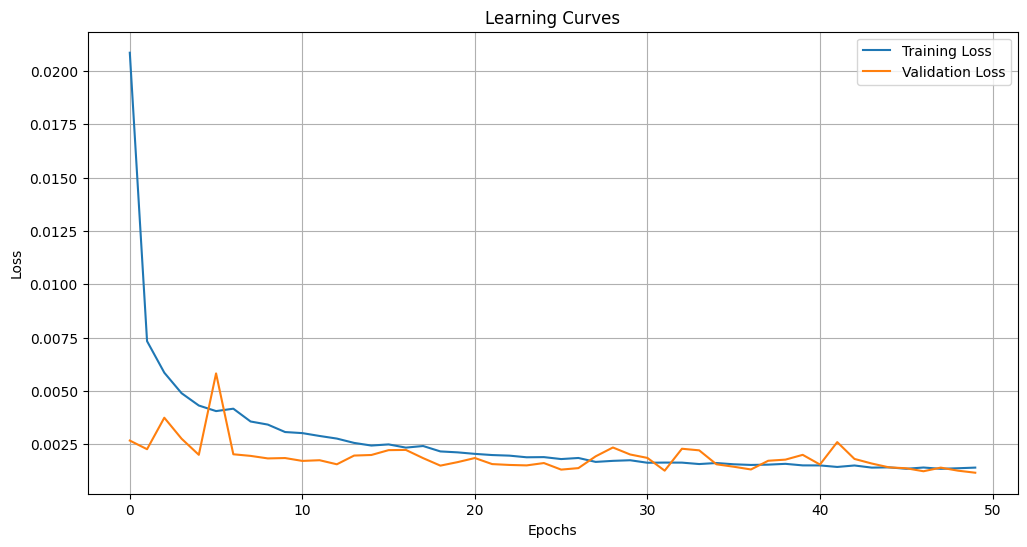

In [ ]:
# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

**Residual Analysis**

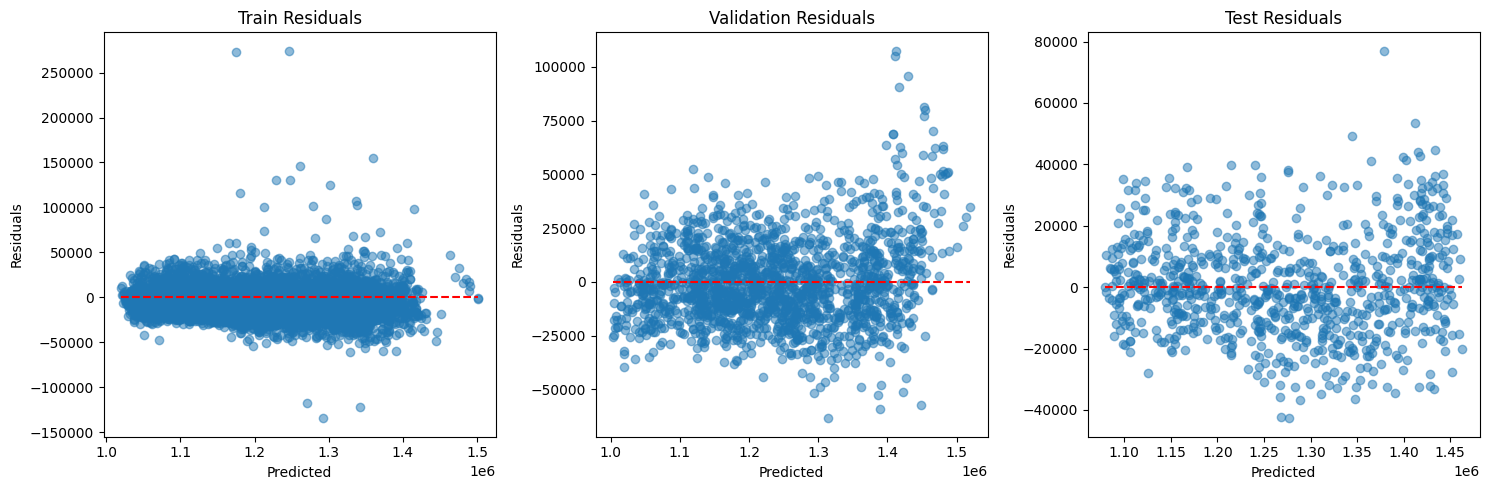

In [ ]:
# Residual Analysis
train_residuals = y_train_true - y_train_pred
val_residuals = y_val_true - y_val_pred
test_residuals = y_test_true - y_test_pred

# Plot residuals
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.hlines(0, min(y_train_pred), max(y_train_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Train Residuals')

plt.subplot(1, 3, 2)
plt.scatter(y_val_pred, val_residuals, alpha=0.5)
plt.hlines(0, min(y_val_pred), max(y_val_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Validation Residuals')

plt.subplot(1, 3, 3)
plt.scatter(y_test_pred, test_residuals, alpha=0.5)
plt.hlines(0, min(y_test_pred), max(y_test_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Test Residuals')

plt.tight_layout()
plt.show()


**MAE, MAPE, and Accuracy Visualization**

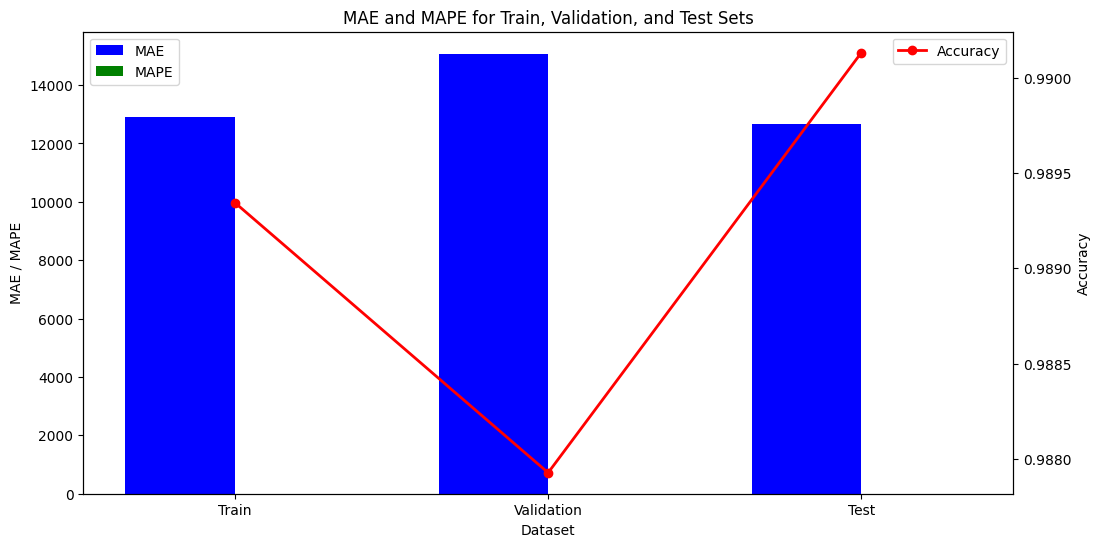

In [ ]:
# Bar plot for MAE, MAPE, and Accuracy
metrics = ['Train', 'Validation', 'Test']
mae_values = [train_mae, val_mae, test_mae]
mape_values = [train_mape, val_mape, test_mape]
accuracy_values = [train_accuracy, val_accuracy, test_accuracy]

x = np.arange(len(metrics))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Create bars for MAE and MAPE
bar_width = 0.35
bar1 = ax1.bar(x - bar_width/2, mae_values, bar_width, label='MAE', color='b')
bar2 = ax1.bar(x + bar_width/2, mape_values, bar_width, label='MAPE', color='g')

# Add labels, title, and legend
ax1.set_xlabel('Dataset')
ax1.set_ylabel('MAE / MAPE')
ax1.set_title('MAE and MAPE for Train, Validation, and Test Sets')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend(loc='upper left')

# Create a secondary y-axis for accuracy
ax2 = ax1.twinx()
ax2.plot(x, accuracy_values, label='Accuracy', color='r', marker='o', linewidth=2)
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')

plt.show()


Dense(12) base training, validation, and testing

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import random

# Set seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Function to create Fourier series
def create_fourier_series(df, period, order):
    t = np.arange(len(df))
    for k in range(1, order + 1):
        df[f'sin_{period}_{k}'] = np.sin(2 * np.pi * k * t / period)
        df[f'cos_{period}_{k}'] = np.cos(2 * np.pi * k * t / period)
    return df

df = create_fourier_series(df, period=24, order=3)
df = create_fourier_series(df, period=24 * 7, order=3)

# Add trend feature
df['trend'] = trend

# Add more lag features
max_lag = 36
for lag in range(1, max_lag + 1):
    df[f'avg_cpu_lag_{lag}'] = df['avg_cpu'].shift(lag)
df.dropna(inplace=True)

# Normalize the features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

features = feature_scaler.fit_transform(df.drop(columns=['avg_cpu']))
target = target_scaler.fit_transform(df['avg_cpu'].values.reshape(-1, 1)).reshape(-1)

# Function to create sliding windows with features
def create_sliding_windows_with_features(data, target, window_size, prediction_size):
    X, y = [], []
    for i in range(len(data) - window_size - prediction_size + 1):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size:i+window_size+prediction_size])
    return np.array(X), np.array(y)

window_size = 50
prediction_size = 12
X, y = create_sliding_windows_with_features(features, target, window_size, prediction_size)

# Split the data into training, validation, and testing sets
total_samples = len(X)
train_size = int(total_samples * 0.7)
val_size = int(total_samples * 0.2)
test_size = total_samples - train_size - val_size

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

In [ ]:
# Define the GRU model with Dense(12) for multi-step prediction
model = Sequential([
    GRU(64, input_shape=(window_size, X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    GRU(32, return_sequences=False),
    Dropout(0.2),
    Dense(prediction_size)  # Predict 12 steps ahead
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)


Epoch 1/50
187/187 [==============================] - 13s 50ms/step - loss: 0.0345 - val_loss: 0.0053
Epoch 2/50
187/187 [==============================] - 9s 46ms/step - loss: 0.0111 - val_loss: 0.0046
Epoch 3/50
187/187 [==============================] - 9s 46ms/step - loss: 0.0081 - val_loss: 0.0047
Epoch 4/50
187/187 [==============================] - 8s 45ms/step - loss: 0.0066 - val_loss: 0.0035
Epoch 5/50
187/187 [==============================] - 9s 49ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 6/50
187/187 [==============================] - 9s 47ms/step - loss: 0.0052 - val_loss: 0.0043
Epoch 7/50
187/187 [==============================] - 9s 46ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 8/50
187/187 [==============================] - 9s 46ms/step - loss: 0.0045 - val_loss: 0.0033
Epoch 9/50
187/187 [==============================] - 9s 47ms/step - loss: 0.0043 - val_loss: 0.0032
Epoch 10/50
187/187 [==============================] - 8s 45ms/step - loss: 0.0039 - val_l

27/27 [==============================] - 0s 12ms/step
Train MAE: 14728.242257398315, Train MAPE: 0.012222101444996877, Train Accuracy: 0.9877778985550031
Validation MAE: 31011.957085740014, Validation MAPE: 0.02427963271962585, Validation Accuracy: 0.9757203672803741
Test MAE: 31770.19211883914, Test MAPE: 0.02468965266067907, Test Accuracy: 0.975310347339321


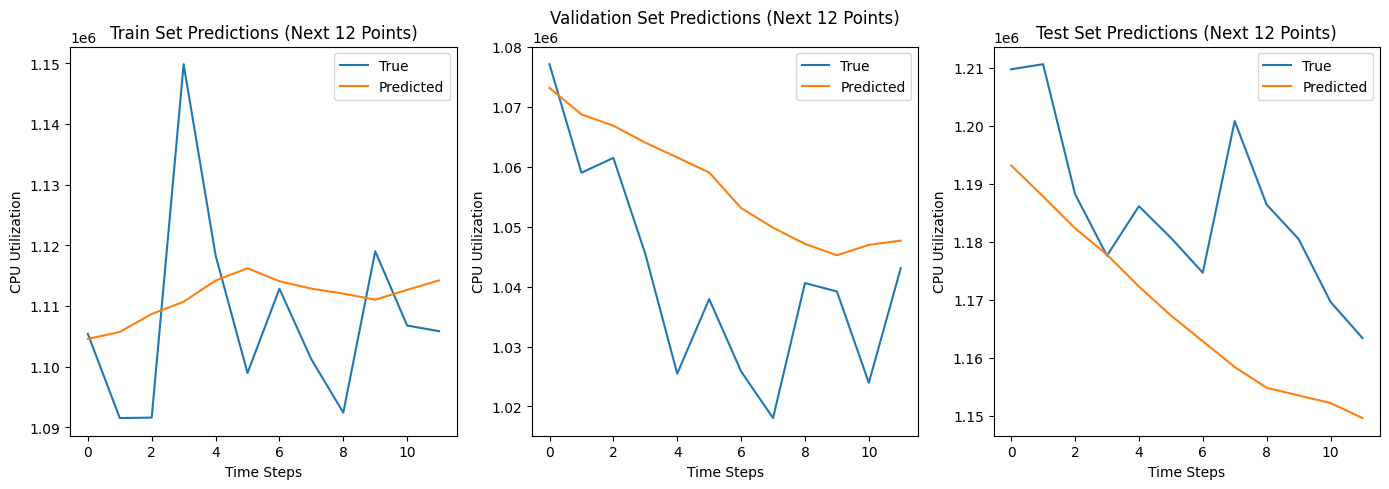

In [ ]:
# Generate predictions for the next 12 data points from the train, validation, and test sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Inverse transform the predictions and true values
y_train_pred = target_scaler.inverse_transform(y_train_pred)
y_val_pred = target_scaler.inverse_transform(y_val_pred)
y_test_pred = target_scaler.inverse_transform(y_test_pred)

y_train_true = target_scaler.inverse_transform(y_train)
y_val_true = target_scaler.inverse_transform(y_val)
y_test_true = target_scaler.inverse_transform(y_test)

# Calculate metrics for multi-step predictions
def calculate_multi_step_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    accuracy = 1 - mape
    return mae, mape, accuracy

# Evaluate and print metrics for train, validation, and test sets
train_mae, train_mape, train_accuracy = calculate_multi_step_metrics(y_train_true, y_train_pred)
val_mae, val_mape, val_accuracy = calculate_multi_step_metrics(y_val_true, y_val_pred)
test_mae, test_mape, test_accuracy = calculate_multi_step_metrics(y_test_true, y_test_pred)

print(f'Train MAE: {train_mae}, Train MAPE: {train_mape}, Train Accuracy: {train_accuracy}')
print(f'Validation MAE: {val_mae}, Validation MAPE: {val_mape}, Validation Accuracy: {val_accuracy}')
print(f'Test MAE: {test_mae}, Test MAPE: {test_mape}, Test Accuracy: {test_accuracy}')

# Plot the predictions vs. true values for the first train, validation, and test samples
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(y_train_true[0], label='True')
plt.plot(y_train_pred[0], label='Predicted')
plt.title('Train Set Predictions (Next 12 Points)')
plt.xlabel('Time Steps')
plt.ylabel('CPU Utilization')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_val_true[0], label='True')
plt.plot(y_val_pred[0], label='Predicted')
plt.title('Validation Set Predictions (Next 12 Points)')
plt.xlabel('Time Steps')
plt.ylabel('CPU Utilization')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test_true[0], label='True')
plt.plot(y_test_pred[0], label='Predicted')
plt.title('Test Set Predictions (Next 12 Points)')
plt.xlabel('Time Steps')
plt.ylabel('CPU Utilization')
plt.legend()

plt.tight_layout()
plt.show()

Dense(12) hyperparameter tuning

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import random

# Set seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Function to create Fourier series
def create_fourier_series(df, period, order):
    t = np.arange(len(df))
    for k in range(1, order + 1):
        df[f'sin_{period}_{k}'] = np.sin(2 * np.pi * k * t / period)
        df[f'cos_{period}_{k}'] = np.cos(2 * np.pi * k * t / period)
    return df

df = create_fourier_series(df, period=24, order=3)
df = create_fourier_series(df, period=24 * 7, order=3)

# Add trend feature
df['trend'] = trend

# Add more lag features
max_lag = 36
for lag in range(1, max_lag + 1):
    df[f'avg_cpu_lag_{lag}'] = df['avg_cpu'].shift(lag)
df.dropna(inplace=True)

# Normalize the features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

features = feature_scaler.fit_transform(df.drop(columns=['avg_cpu']))
target = target_scaler.fit_transform(df['avg_cpu'].values.reshape(-1, 1)).reshape(-1)

# Function to create sliding windows with features
def create_sliding_windows_with_features(data, target, window_size, prediction_size):
    X, y = [], []
    for i in range(len(data) - window_size - prediction_size + 1):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size:i+window_size+prediction_size])
    return np.array(X), np.array(y)

window_size = 50
prediction_size = 12
X, y = create_sliding_windows_with_features(features, target, window_size, prediction_size)

# Split the data into training, validation, and testing sets
total_samples = len(X)
train_size = int(total_samples * 0.7)
val_size = int(total_samples * 0.2)
test_size = total_samples - train_size - val_size

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

In [ ]:
from sklearn.model_selection import ParameterSampler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the hyperparameter search space
param_grid = {
    'units_1': [32, 64, 128],
    'units_2': [16, 32, 64],
    'dropout_rate_1': [0.2, 0.3, 0.4],
    'dropout_rate_2': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.0005, 0.0001]
}

# Generate random combinations of parameters
n_iter_search = 10  # Number of parameter settings that are sampled
random_search = ParameterSampler(param_grid, n_iter=n_iter_search, random_state=42)


In [ ]:
# Function to build the model
def build_model(input_shape, units_1, units_2, dropout_rate_1, dropout_rate_2, learning_rate):
    model = Sequential([
        GRU(units_1, input_shape=input_shape, return_sequences=True),
        Dropout(dropout_rate_1),
        GRU(units_2, return_sequences=False),
        Dropout(dropout_rate_2),
        Dense(12)  # Predict 12 steps ahead
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Function to train and evaluate the model
def train_and_evaluate(params, X_train, y_train, X_val, y_val):
    model = build_model(
        input_shape=(X_train.shape[1], X_train.shape[2]),
        units_1=params['units_1'],
        units_2=params['units_2'],
        dropout_rate_1=params['dropout_rate_1'],
        dropout_rate_2=params['dropout_rate_2'],
        learning_rate=params['learning_rate']
    )

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])

    val_pred = model.predict(X_val)
    val_true = y_val

    mae = mean_absolute_error(val_true, val_pred)
    return mae, model


In [ ]:
# Perform random search
best_mae = float('inf')
best_params = None
best_model = None

for params in random_search:
    mae, model = train_and_evaluate(params, X_train, y_train, X_val, y_val)
    print(f"Params: {params}, Validation MAE: {mae}")

    if mae < best_mae:
        best_mae = mae
        best_params = params
        best_model = model

print(f"Best Params: {best_params}, Best Validation MAE: {best_mae}")


Epoch 1/50
187/187 [==============================] - 16s 66ms/step - loss: 0.0915 - val_loss: 0.0494
Epoch 2/50
187/187 [==============================] - 11s 60ms/step - loss: 0.0545 - val_loss: 0.0289
Epoch 3/50
187/187 [==============================] - 11s 60ms/step - loss: 0.0394 - val_loss: 0.0188
Epoch 4/50
187/187 [==============================] - 12s 62ms/step - loss: 0.0311 - val_loss: 0.0131
Epoch 5/50
187/187 [==============================] - 11s 61ms/step - loss: 0.0256 - val_loss: 0.0108
Epoch 6/50
187/187 [==============================] - 11s 61ms/step - loss: 0.0221 - val_loss: 0.0083
Epoch 7/50
187/187 [==============================] - 11s 59ms/step - loss: 0.0197 - val_loss: 0.0077
Epoch 8/50
187/187 [==============================] - 11s 60ms/step - loss: 0.0174 - val_loss: 0.0083
Epoch 9/50
187/187 [==============================] - 11s 61ms/step - loss: 0.0158 - val_loss: 0.0075
Epoch 10/50
187/187 [==============================] - 12s 63ms/step - loss: 0.014

54/54 [==============================] - 1s 17ms/step
Train MAE: 18693.62661173165, Train MAPE: 0.015328166083297646, Train Accuracy: 0.9846718339167023
Validation MAE: 22267.597116837384, Validation MAPE: 0.017625340302449246, Validation Accuracy: 0.9823746596975508
Test MAE: 19796.614950982217, Test MAPE: 0.015395317696678033, Test Accuracy: 0.984604682303322


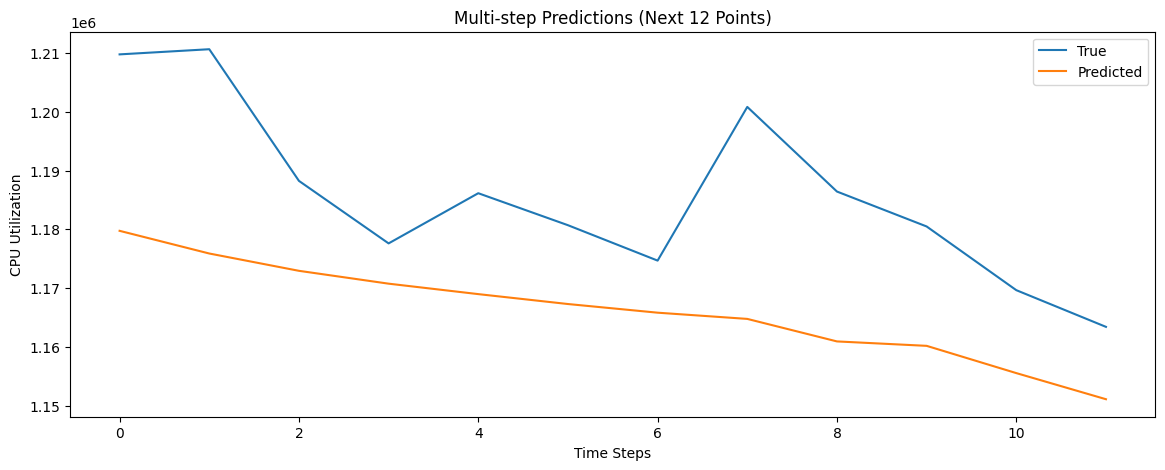

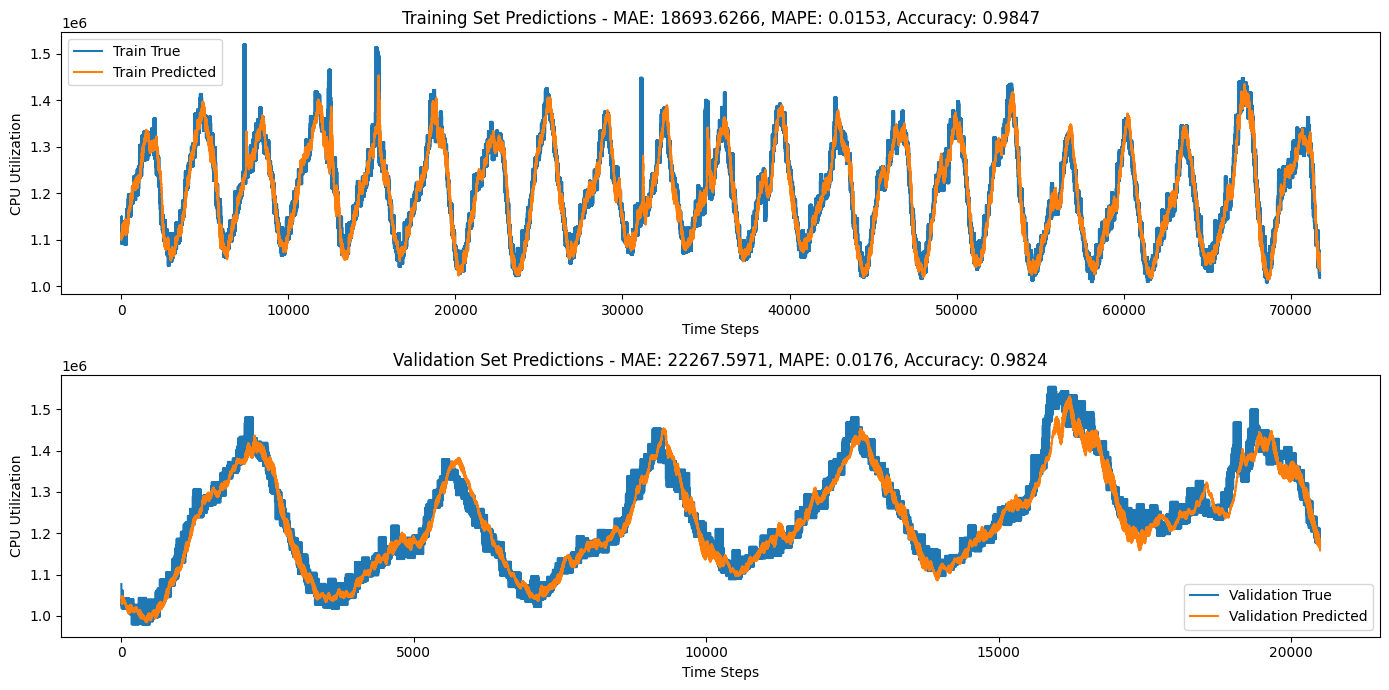

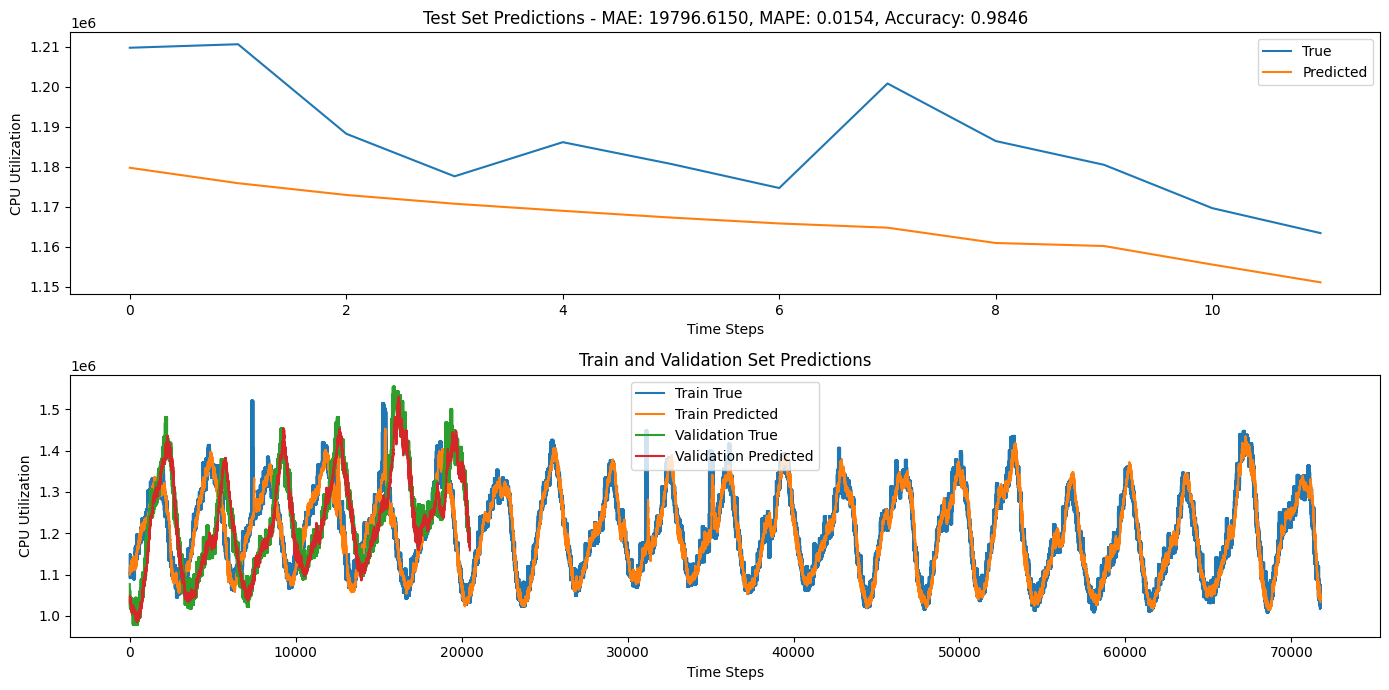

In [ ]:
# Generate predictions for the next 12 data points from the test set
y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

# Inverse transform the predictions and true values
y_test_pred = target_scaler.inverse_transform(y_test_pred)
y_test_true = target_scaler.inverse_transform(y_test)

y_train_pred = target_scaler.inverse_transform(y_train_pred)
y_train_true = target_scaler.inverse_transform(y_train)

y_val_pred = target_scaler.inverse_transform(y_val_pred)
y_val_true = target_scaler.inverse_transform(y_val)

# Calculate metrics for multi-step predictions
def calculate_multi_step_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    accuracy = 1 - mape
    return mae, mape, accuracy

# Evaluate and print metrics for the Dense(12) model on the test set
train_mae, train_mape, train_accuracy = calculate_multi_step_metrics(y_train_true, y_train_pred)
val_mae, val_mape, val_accuracy = calculate_multi_step_metrics(y_val_true, y_val_pred)
test_mae, test_mape, test_accuracy = calculate_multi_step_metrics(y_test_true, y_test_pred)

print(f'Train MAE: {train_mae}, Train MAPE: {train_mape}, Train Accuracy: {train_accuracy}')
print(f'Validation MAE: {val_mae}, Validation MAPE: {val_mape}, Validation Accuracy: {val_accuracy}')
print(f'Test MAE: {test_mae}, Test MAPE: {test_mape}, Test Accuracy: {test_accuracy}')

# Plot the predictions vs. true values for the first test sample
plt.figure(figsize=(14, 5))
plt.plot(y_test_true[0], label='True')
plt.plot(y_test_pred[0], label='Predicted')
plt.title('Multi-step Predictions (Next 12 Points)')
plt.xlabel('Time Steps')
plt.ylabel('CPU Utilization')
plt.legend()
plt.show()

# Plot the train and validation set predictions
plt.figure(figsize=(14, 7))

# Plot the training set predictions
plt.subplot(2, 1, 1)
plt.plot(y_train_true.flatten(), label='Train True')
plt.plot(y_train_pred.flatten(), label='Train Predicted')
plt.title(f'Training Set Predictions - MAE: {train_mae:.4f}, MAPE: {train_mape:.4f}, Accuracy: {train_accuracy:.4f}')
plt.xlabel('Time Steps')
plt.ylabel('CPU Utilization')
plt.legend()

# Plot the validation set predictions
plt.subplot(2, 1, 2)
plt.plot(y_val_true.flatten(), label='Validation True')
plt.plot(y_val_pred.flatten(), label='Validation Predicted')
plt.title(f'Validation Set Predictions - MAE: {val_mae:.4f}, MAPE: {val_mape:.4f}, Accuracy: {val_accuracy:.4f}')
plt.xlabel('Time Steps')
plt.ylabel('CPU Utilization')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the test set predictions with metrics displayed
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(y_test_true[0], label='True')
plt.plot(y_test_pred[0], label='Predicted')
plt.title(f'Test Set Predictions - MAE: {test_mae:.4f}, MAPE: {test_mape:.4f}, Accuracy: {test_accuracy:.4f}')
plt.xlabel('Time Steps')
plt.ylabel('CPU Utilization')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(y_train_true.flatten(), label='Train True')
plt.plot(y_train_pred.flatten(), label='Train Predicted')
plt.plot(y_val_true.flatten(), label='Validation True')
plt.plot(y_val_pred.flatten(), label='Validation Predicted')
plt.title('Train and Validation Set Predictions')
plt.xlabel('Time Steps')
plt.ylabel('CPU Utilization')
plt.legend()

plt.tight_layout()
plt.show()

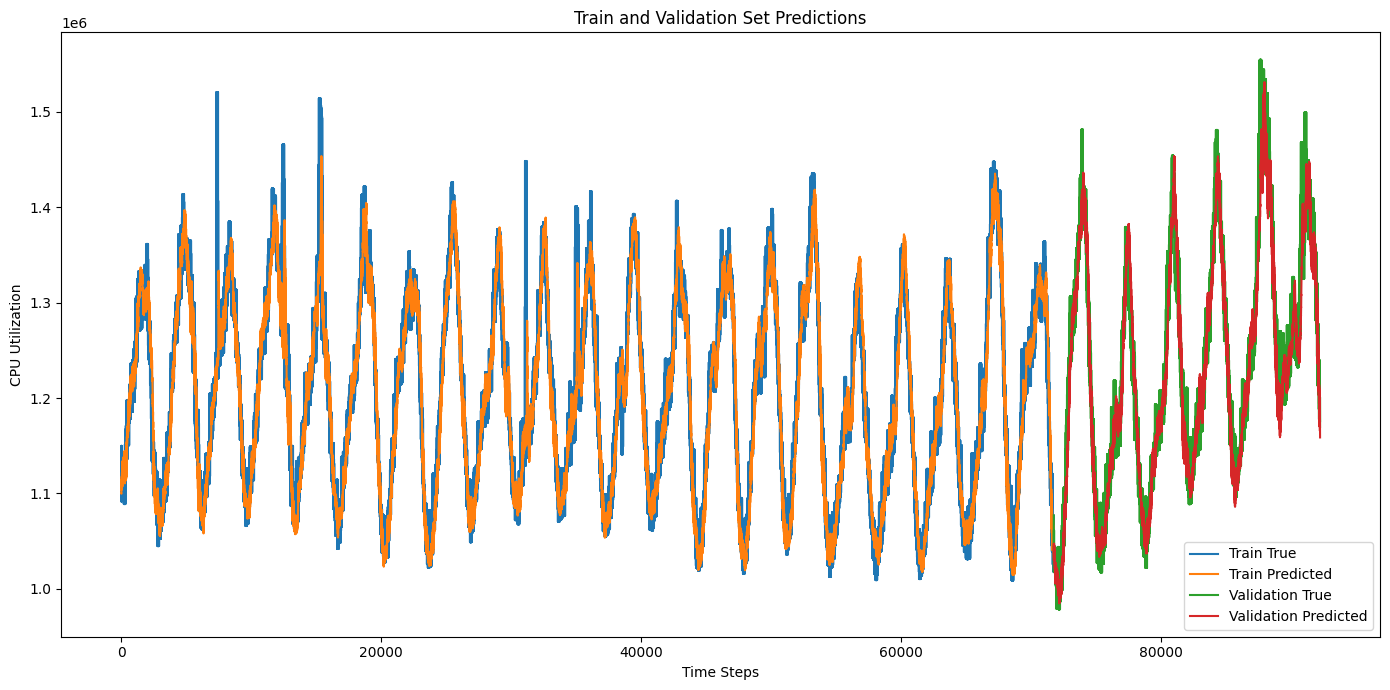

In [ ]:
# Flatten the predictions and true values
y_train_true_flat = y_train_true.flatten()
y_train_pred_flat = y_train_pred.flatten()
y_val_true_flat = y_val_true.flatten()
y_val_pred_flat = y_val_pred.flatten()

# Create the x-axis values
x_train = np.arange(len(y_train_true_flat))
x_val = np.arange(len(y_val_true_flat)) + len(y_train_true_flat)

# Plot the training and validation set predictions
plt.figure(figsize=(14, 7))

# Training data
plt.plot(x_train, y_train_true_flat, label='Train True')
plt.plot(x_train, y_train_pred_flat, label='Train Predicted')

# Validation data
plt.plot(x_val, y_val_true_flat, label='Validation True')
plt.plot(x_val, y_val_pred_flat, label='Validation Predicted')

plt.title('Train and Validation Set Predictions')
plt.xlabel('Time Steps')
plt.ylabel('CPU Utilization')
plt.legend()
plt.tight_layout()
plt.show()

**Best Model Training, Validation, and Testing**

In [ ]:
# Set seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Function to create Fourier series
def create_fourier_series(df, period, order):
    t = np.arange(len(df))
    for k in range(1, order + 1):
        df[f'sin_{period}_{k}'] = np.sin(2 * np.pi * k * t / period)
        df[f'cos_{period}_{k}'] = np.cos(2 * np.pi * k * t / period)
    return df

# Assuming df is already loaded with necessary data and 'trend' feature is available
df = create_fourier_series(df, period=24, order=3)
df = create_fourier_series(df, period=24 * 7, order=3)
df['trend'] = trend

# Add more lag features
max_lag = 36
for lag in range(1, max_lag + 1):
    df[f'avg_cpu_lag_{lag}'] = df['avg_cpu'].shift(lag)
df.dropna(inplace=True)

# Normalize the features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

features = feature_scaler.fit_transform(df.drop(columns=['avg_cpu']))
target = target_scaler.fit_transform(df['avg_cpu'].values.reshape(-1, 1)).reshape(-1)

# Function to create sliding windows with features
def create_sliding_windows_with_features(data, target, window_size, prediction_size):
    X, y = [], []
    for i in range(len(data) - window_size - prediction_size + 1):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size:i+window_size+prediction_size])
    return np.array(X), np.array(y)

window_size = 50
prediction_size = 12
X, y = create_sliding_windows_with_features(features, target, window_size, prediction_size)

# Split the data into training, validation, and testing sets
total_samples = len(X)
train_size = int(total_samples * 0.7)
val_size = int(total_samples * 0.2)
test_size = total_samples - train_size - val_size

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

In [ ]:
# Best hyperparameters obtained from random search
best_params = {'units_2': 64, 'units_1': 128, 'learning_rate': 0.0005, 'dropout_rate_2': 0.4, 'dropout_rate_1': 0.3}

# Function to build the model
def build_best_model(input_shape):
    model = Sequential([
        GRU(best_params['units_1'], input_shape=input_shape, return_sequences=True),
        Dropout(best_params['dropout_rate_1']),
        GRU(best_params['units_2'], return_sequences=False),
        Dropout(best_params['dropout_rate_2']),
        Dense(12)  # Predict 12 steps ahead
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']), loss='mse')
    return model

In [ ]:
# Build and train the best model
best_model = build_best_model((X_train.shape[1], X_train.shape[2]))

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
187/187 [==============================] - 16s 66ms/step - loss: 0.0354 - val_loss: 0.0054
Epoch 2/50
187/187 [==============================] - 11s 61ms/step - loss: 0.0146 - val_loss: 0.0071
Epoch 3/50
187/187 [==============================] - 12s 63ms/step - loss: 0.0106 - val_loss: 0.0050
Epoch 4/50
187/187 [==============================] - 12s 62ms/step - loss: 0.0089 - val_loss: 0.0034
Epoch 5/50
187/187 [==============================] - 12s 64ms/step - loss: 0.0074 - val_loss: 0.0033
Epoch 6/50
187/187 [==============================] - 12s 65ms/step - loss: 0.0068 - val_loss: 0.0050
Epoch 7/50
187/187 [==============================] - 12s 67ms/step - loss: 0.0061 - val_loss: 0.0050
Epoch 8/50
187/187 [==============================] - 12s 66ms/step - loss: 0.0058 - val_loss: 0.0035
Epoch 9/50
187/187 [==============================] - 11s 61ms/step - loss: 0.0051 - val_loss: 0.0031
Epoch 10/50
187/187 [==============================] - 12s 63ms/step - loss: 0.005

54/54 [==============================] - 1s 19ms/step
Train MAE: 22121.2116166924, Train MAPE: 0.01819853138159406, Train Accuracy: 0.9818014686184059
Validation MAE: 23929.410416864976, Validation MAPE: 0.01903833276738153, Validation Accuracy: 0.9809616672326185
Test MAE: 20584.938761094498, Test MAPE: 0.016005842893007917, Test Accuracy: 0.9839941571069921


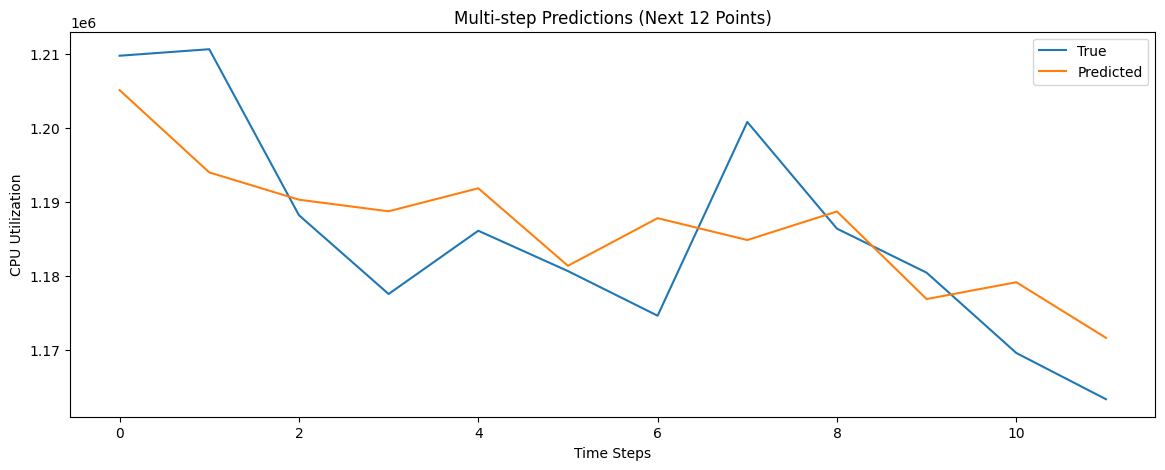

In [ ]:
# Generate predictions for the next 12 data points from the test set
y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

# Inverse transform the predictions and true values
y_test_pred = target_scaler.inverse_transform(y_test_pred)
y_test_true = target_scaler.inverse_transform(y_test)

y_train_pred = target_scaler.inverse_transform(y_train_pred)
y_train_true = target_scaler.inverse_transform(y_train)

y_val_pred = target_scaler.inverse_transform(y_val_pred)
y_val_true = target_scaler.inverse_transform(y_val)

# Calculate metrics for multi-step predictions
def calculate_multi_step_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    accuracy = 1 - mape
    return mae, mape, accuracy

# Evaluate and print metrics for the Dense(12) model on the test set
train_mae, train_mape, train_accuracy = calculate_multi_step_metrics(y_train_true, y_train_pred)
val_mae, val_mape, val_accuracy = calculate_multi_step_metrics(y_val_true, y_val_pred)
test_mae, test_mape, test_accuracy = calculate_multi_step_metrics(y_test_true, y_test_pred)

print(f'Train MAE: {train_mae}, Train MAPE: {train_mape}, Train Accuracy: {train_accuracy}')
print(f'Validation MAE: {val_mae}, Validation MAPE: {val_mape}, Validation Accuracy: {val_accuracy}')
print(f'Test MAE: {test_mae}, Test MAPE: {test_mape}, Test Accuracy: {test_accuracy}')

# Plot the predictions vs. true values for the first test sample
plt.figure(figsize=(14, 5))
plt.plot(y_test_true[0], label='True')
plt.plot(y_test_pred[0], label='Predicted')
plt.title('Multi-step Predictions (Next 12 Points)')
plt.xlabel('Time Steps')
plt.ylabel('CPU Utilization')
plt.legend()
plt.show()

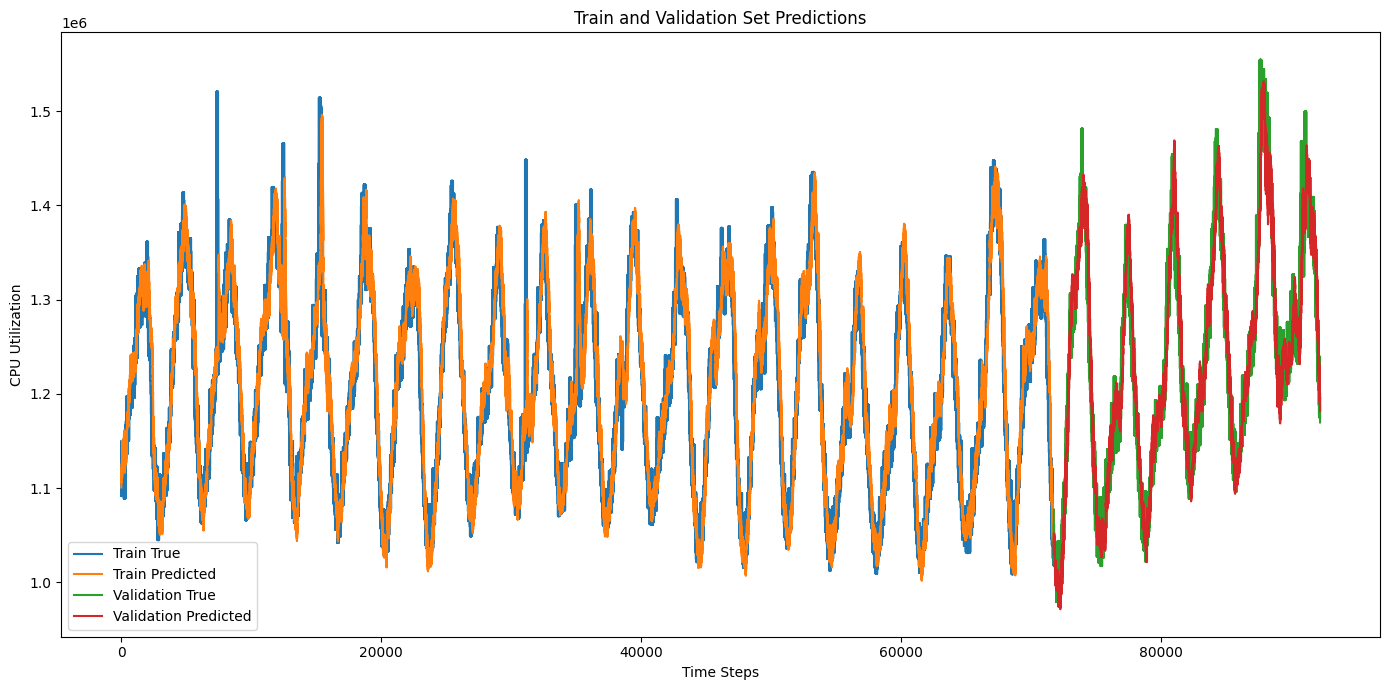

In [ ]:
# Plot the train and validation set predictions
plt.figure(figsize=(14, 7))

# Plot the training and validation set predictions in a single subplot
y_train_true_flat = y_train_true.flatten()
y_train_pred_flat = y_train_pred.flatten()
y_val_true_flat = y_val_true.flatten()
y_val_pred_flat = y_val_pred.flatten()

x_train = np.arange(len(y_train_true_flat))
x_val = np.arange(len(y_val_true_flat)) + len(y_train_true_flat)

plt.plot(x_train, y_train_true_flat, label='Train True')
plt.plot(x_train, y_train_pred_flat, label='Train Predicted')
plt.plot(x_val, y_val_true_flat, label='Validation True')
plt.plot(x_val, y_val_pred_flat, label='Validation Predicted')

plt.title('Train and Validation Set Predictions')
plt.xlabel('Time Steps')
plt.ylabel('CPU Utilization')
plt.legend()
plt.tight_layout()
plt.show()


**Deployment Mock Up**

In [ ]:
import pickle
import tensorflow as tf

# Assuming 'best_model' is the GRU model you trained
# Save the trained TensorFlow/Keras model
model_final.save('model_final.h5')

# Save the feature scaler and target scaler
with open('feature_scaler.pkl', 'wb') as f:
    pickle.dump(feature_scaler, f)

with open('target_scaler.pkl', 'wb') as f:
    pickle.dump(target_scaler, f)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Assuming you have your model named 'model'
best_model.save('best_model.h5')

# Download the model file
from google.colab import files
files.download('best_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Define needed columns
desired_columns = ["timestamp", "avg cpu"]
new_column_names = {"timestamp": "time", "avg cpu": "avg_cpu"}

# Read the CSV file
df = pd.read_csv("cpu_util.csv", usecols=desired_columns, parse_dates=["timestamp"])

# Rename columns to new names
df = df.rename(columns=new_column_names)

# Set the time column to index and make it into a period
df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True)
df = df.set_index("time")

# Split the data into training, validation, and testing sets
total_samples = len(df)
train_size = int(total_samples * 0.7)
val_size = int(total_samples * 0.2)
test_size = total_samples - train_size - val_size

df_train = df.iloc[:train_size]
df_val = df.iloc[train_size:train_size + val_size]
df_test = df.iloc[train_size + val_size:]


<ipython-input-199-670e84878856>:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True)


In [ ]:
df_test.shape

(864, 1)

In [1]:
import pandas as pd
import numpy as np

# Define needed columns
desired_columns = ["timestamp", "avg cpu"]
new_column_names = {"timestamp": "time", "avg cpu": "avg_cpu"}

# Read the CSV file
df = pd.read_csv("cpu_util.csv", usecols=desired_columns, parse_dates=["timestamp"])

# Rename columns to new names
df = df.rename(columns=new_column_names)

# Set the time column to index and make it into a period
df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True)
df = df.set_index("time")

# Split the data into training, validation, and testing sets
total_samples = len(df)
train_size = int(total_samples * 0.7)
val_size = int(total_samples * 0.2)
test_size = total_samples - train_size - val_size

df_train = df.iloc[:train_size]
df_val = df.iloc[train_size:train_size + val_size]
df_test = df.iloc[train_size + val_size:]

# Analyze data to find high and low utilization segments
rolling_mean = df_test['avg_cpu'].rolling(window=20).mean()

# Define thresholds for high and low utilization
high_threshold = rolling_mean.quantile(0.9)
low_threshold = rolling_mean.quantile(0.1)

# Find indices for high and low utilization
high_util_indices = rolling_mean[rolling_mean > high_threshold].index
low_util_indices = rolling_mean[rolling_mean < low_threshold].index

# Function to create test case based on indices
def create_test_case_by_indices(indices, length):
    start_index = indices[0]
    return df_test.loc[start_index:start_index + pd.Timedelta(minutes=(length-1)*5)]

# Creating different test cases
test_case_normal = df_test.iloc[:200]  # Normal operating condition
test_case_high_util = create_test_case_by_indices(high_util_indices, 150)  # High CPU usage
test_case_low_util = create_test_case_by_indices(low_util_indices, 150)  # Low CPU usage

# Sudden spike: Identify a segment with a sharp increase
spike_indices = df_test['avg_cpu'].diff().abs().sort_values(ascending=False).index[:200]
test_case_spike = df_test.loc[spike_indices[0]:spike_indices[0] + pd.Timedelta(minutes=199*5)]

# Gradual increase: Find a period with a consistent upward trend
gradual_increase_indices = df_test['avg_cpu'].diff().rolling(window=10).mean().sort_values(ascending=False).index[:150]
test_case_gradual_increase = df_test.loc[gradual_increase_indices[0]:gradual_increase_indices[0] + pd.Timedelta(minutes=149*5)]

# Save test cases to CSV files
test_case_normal.to_csv("test_case_normal.csv")
test_case_high_util.to_csv("test_case_high_util.csv")
test_case_low_util.to_csv("test_case_low_util.csv")
test_case_spike.to_csv("test_case_spike.csv")
test_case_gradual_increase.to_csv("test_case_gradual_increase.csv")

print("Test cases created and saved successfully.")


Test cases created and saved successfully.


<ipython-input-1-791befaaac1c>:15: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True)


In [ ]:
import pandas as pd

# Extract the first 200 rows of the test set
first_200_rows = df_test.head(200)

# Save the first 200 rows to a CSV file
first_200_rows.to_csv("test_input.csv", index=True)


In [ ]:
first_200_rows.shape

(200, 1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle

# Load the first 200 rows of the test set from the CSV file
test_input_df = pd.read_csv("test_input.csv", parse_dates=["time"], index_col="time")

# Load the saved scalers
with open('feature_scaler.pkl', 'rb') as f:
    feature_scaler = pickle.load(f)

with open('target_scaler.pkl', 'rb') as f:
    target_scaler = pickle.load(f)

# Clean and preprocess the data
def create_fourier_series(df, period, order):
    t = np.arange(len(df))
    for k in range(1, order + 1):
        df[f'sin_{period}_{k}'] = np.sin(2 * np.pi * k * t / period)
        df[f'cos_{period}_{k}'] = np.cos(2 * np.pi * k * t / period)
    return df

def preprocess_data(df):
    # Calculate IQR
    Q1 = df['avg_cpu'].quantile(0.25)
    Q3 = df['avg_cpu'].quantile(0.75)
    IQR = Q3 - Q1

    # Define a threshold to identify anomalies (e.g., 1.5 * IQR)
    iqr_threshold = 1.5
    lower_bound = Q1 - iqr_threshold * IQR
    upper_bound = Q3 + iqr_threshold * IQR
    anomalies_iqr = df[(df['avg_cpu'] < lower_bound) | (df['avg_cpu'] > upper_bound)]

    # Mark anomalies
    df['anomaly'] = (df['avg_cpu'] < lower_bound) | (df['avg_cpu'] > upper_bound)

    # Interpolating anomalies
    df['avg_cpu'] = np.where(df['anomaly'] == True, np.nan, df['avg_cpu'])
    df['avg_cpu'] = df['avg_cpu'].interpolate(method='time')

    # Drop the anomaly column as it's no longer needed
    df = df.drop(columns=['anomaly'])

    # Add polynomial trends
    time_numeric = np.arange(len(df)).reshape(-1, 1)
    degree = 2
    poly = PolynomialFeatures(degree=degree)
    time_poly = poly.fit_transform(time_numeric)
    model = LinearRegression()
    model.fit(time_poly, df['avg_cpu'])
    trend = model.predict(time_poly)
    df['trend'] = trend

    # Add Fourier series
    df = create_fourier_series(df, period=24, order=3)
    df = create_fourier_series(df, period=24 * 7, order=3)
    df['trend'] = trend

    # Add lag features
    max_lag = 36
    for lag in range(1, max_lag + 1):
        df[f'avg_cpu_lag_{lag}'] = df['avg_cpu'].shift(lag)
    df.dropna(inplace=True)

    return df

# Preprocess the test input data
test_input_df = preprocess_data(test_input_df)

# Check the number of rows after preprocessing
print("Number of rows after preprocessing:", len(test_input_df))


Number of rows after preprocessing: 164


In [ ]:
# Normalize the features using the saved scaler
features = test_input_df.drop(columns=['avg_cpu'])
features_scaled = feature_scaler.transform(features)

# Function to create sliding windows
def create_sliding_windows(data, window_size):
    X = []
    for i in range(len(data) - window_size + 1):
        X.append(data[i:i+window_size])
    return np.array(X)

window_size = 50

# Create sliding windows for input data
X_input = create_sliding_windows(features_scaled, window_size)

# Check if we have enough data for sliding windows
if len(X_input) == 0:
    raise ValueError("Not enough data to create sliding windows. Ensure you have at least 'window_size' rows after preprocessing.")


1/1 [==============================] - 1s 738ms/step
The highest predicted CPU usage is 1420278.25 at 2017-01-28 16:40:00. The lowest predicted CPU usage is 1401083.00 at 2017-01-28 17:25:00. Administrators should prepare for the highest usage and monitor the system closely during this period.
Predicted DataFrame:
                     predicted_avg_cpu
time                                  
2017-01-28 16:40:00        1420278.250
2017-01-28 16:45:00        1415324.500
2017-01-28 16:50:00        1413140.125
2017-01-28 16:55:00        1408557.250
2017-01-28 17:00:00        1417285.000
2017-01-28 17:05:00        1403985.625
2017-01-28 17:10:00        1413082.875
2017-01-28 17:15:00        1404602.250
2017-01-28 17:20:00        1416227.500
2017-01-28 17:25:00        1401083.000
2017-01-28 17:30:00        1408313.250
2017-01-28 17:35:00        1407661.875


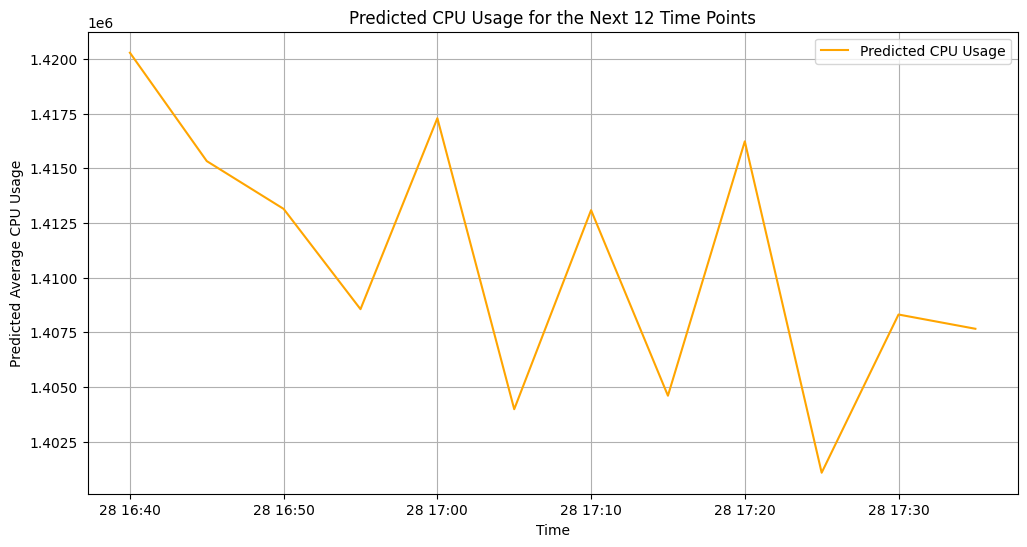

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved TensorFlow/Keras model
model = load_model('best_model.h5')

# Make predictions
y_pred = model.predict(X_input[-1].reshape(1, window_size, -1))

# Inverse transform the predictions
y_pred = target_scaler.inverse_transform(y_pred)

# Generate the timestamps for the predicted values
last_actual_timestamp = test_input_df.index[-1]
predicted_timestamps = pd.date_range(start=last_actual_timestamp, periods=13, freq='5T')[1:]

# Create the predicted_df DataFrame
predicted_df = pd.DataFrame({
    'time': predicted_timestamps,
    'predicted_avg_cpu': y_pred.flatten()
})
predicted_df.set_index('time', inplace=True)

# Identify the highest and lowest predicted values and their corresponding times
max_pred = predicted_df['predicted_avg_cpu'].max()
max_pred_time = predicted_df['predicted_avg_cpu'].idxmax()
min_pred = predicted_df['predicted_avg_cpu'].min()
min_pred_time = predicted_df['predicted_avg_cpu'].idxmin()

# Generate the advice based on the predictions
advice = f"The highest predicted CPU usage is {max_pred:.2f} at {max_pred_time}. " \
         f"The lowest predicted CPU usage is {min_pred:.2f} at {min_pred_time}. " \
         "Administrators should prepare for the highest usage and monitor the system closely during this period."

# Print the advice
print(advice)

# Check the predicted DataFrame
print("Predicted DataFrame:")
print(predicted_df)

# Generate the plot
plt.figure(figsize=(12, 6))
plt.plot(predicted_df.index, predicted_df['predicted_avg_cpu'], label='Predicted CPU Usage', color='orange')

# Add title and labels
plt.title('Predicted CPU Usage for the Next 12 Time Points')
plt.xlabel('Time')
plt.ylabel('Predicted Average CPU Usage')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


**Deployment mockup for Dense(1)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the first 200 rows of the test set from the CSV file
test_input_df = pd.read_csv("test_input.csv", parse_dates=["time"], index_col="time")

# Load the saved scalers
with open('feature_scaler.pkl', 'rb') as f:
    feature_scaler = pickle.load(f)

with open('target_scaler.pkl', 'rb') as f:
    target_scaler = pickle.load(f)

# Clean and preprocess the data
def create_fourier_series(df, period, order):
    t = np.arange(len(df))
    for k in range(1, order + 1):
        df[f'sin_{period}_{k}'] = np.sin(2 * np.pi * k * t / period)
        df[f'cos_{period}_{k}'] = np.cos(2 * np.pi * k * t / period)
    return df

def preprocess_data(df):
    # Calculate IQR
    Q1 = df['avg_cpu'].quantile(0.25)
    Q3 = df['avg_cpu'].quantile(0.75)
    IQR = Q3 - Q1

    # Define a threshold to identify anomalies (e.g., 1.5 * IQR)
    iqr_threshold = 1.5
    lower_bound = Q1 - iqr_threshold * IQR
    upper_bound = Q3 + iqr_threshold * IQR
    anomalies_iqr = df[(df['avg_cpu'] < lower_bound) | (df['avg_cpu'] > upper_bound)]

    # Mark anomalies
    df['anomaly'] = (df['avg_cpu'] < lower_bound) | (df['avg_cpu'] > upper_bound)

    # Interpolating anomalies
    df['avg_cpu'] = np.where(df['anomaly'] == True, np.nan, df['avg_cpu'])
    df['avg_cpu'] = df['avg_cpu'].interpolate(method='time')

    # Drop the anomaly column as it's no longer needed
    df = df.drop(columns=['anomaly'])

    # Add polynomial trends
    time_numeric = np.arange(len(df)).reshape(-1, 1)
    degree = 2
    poly = PolynomialFeatures(degree=degree)
    time_poly = poly.fit_transform(time_numeric)
    model = LinearRegression()
    model.fit(time_poly, df['avg_cpu'])
    trend = model.predict(time_poly)
    df['trend'] = trend

    # Add Fourier series
    df = create_fourier_series(df, period=24, order=3)
    df = create_fourier_series(df, period=24 * 7, order=3)
    df['trend'] = trend

    # Add lag features
    max_lag = 36
    for lag in range(1, max_lag + 1):
        df[f'avg_cpu_lag_{lag}'] = df['avg_cpu'].shift(lag)
    df.dropna(inplace=True)

    return df

# Preprocess the test input data
test_input_df = preprocess_data(test_input_df)

# Check the number of rows after preprocessing
print("Number of rows after preprocessing:", len(test_input_df))

Number of rows after preprocessing: 164


In [ ]:
# Normalize the features using the saved scaler
features = test_input_df.drop(columns=['avg_cpu'])
features_scaled = feature_scaler.transform(features)

# Function to create sliding windows
def create_sliding_windows(data, window_size):
    X = []
    for i in range(len(data) - window_size + 1):
        X.append(data[i:i+window_size])
    return np.array(X)

window_size = 50

# Create sliding windows for input data
X_input = create_sliding_windows(features_scaled, window_size)

# Check if we have enough data for sliding windows
if len(X_input) == 0:
    raise ValueError("Not enough data to create sliding windows. Ensure you have at least 'window_size' rows after preprocessing.")


1/1 [==============================] - 0s 487ms/step
The predicted CPU usage at 2017-01-28 16:40:00 is 1430664.25. Administrators should monitor the system closely during this period.
Predicted DataFrame:
                     predicted_avg_cpu
time                                  
2017-01-28 16:40:00         1430664.25


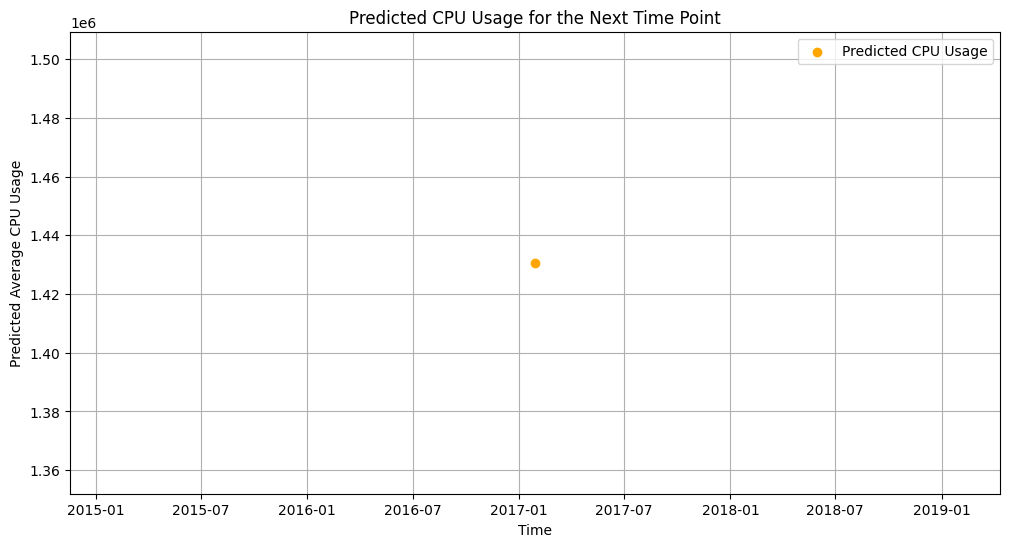

In [ ]:
# Load the saved TensorFlow/Keras model
model = load_model('model_final.h5')

# Make predictions
y_pred = model.predict(X_input[-1].reshape(1, window_size, -1))

# Inverse transform the predictions
y_pred = target_scaler.inverse_transform(y_pred)

# Generate the timestamp for the predicted value
last_actual_timestamp = test_input_df.index[-1]
predicted_timestamp = last_actual_timestamp + pd.Timedelta(minutes=5)

# Create the predicted_df DataFrame
predicted_df = pd.DataFrame({
    'time': [predicted_timestamp],
    'predicted_avg_cpu': y_pred.flatten()
})
predicted_df.set_index('time', inplace=True)

# Generate the advice based on the prediction
predicted_value = predicted_df['predicted_avg_cpu'].iloc[0]
advice = f"The predicted CPU usage at {predicted_timestamp} is {predicted_value:.2f}. " \
         "Administrators should monitor the system closely during this period."

# Print the advice
print(advice)

# Check the predicted DataFrame
print("Predicted DataFrame:")
print(predicted_df)

# Generate the plot
plt.figure(figsize=(12, 6))
plt.scatter(predicted_df.index, predicted_df['predicted_avg_cpu'], label='Predicted CPU Usage', color='orange')

# Add title and labels
plt.title('Predicted CPU Usage for the Next Time Point')
plt.xlabel('Time')
plt.ylabel('Predicted Average CPU Usage')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()